### Loading and splitting the data

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import keras as ks

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
np.unique(y_train)

Using TensorFlow backend.


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Visualising classes

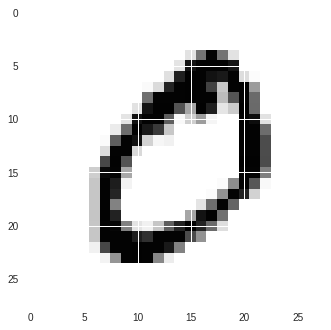

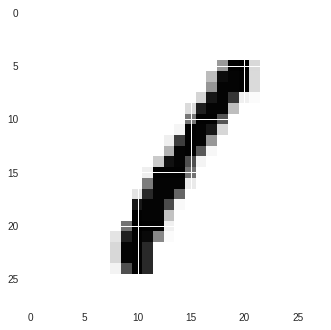

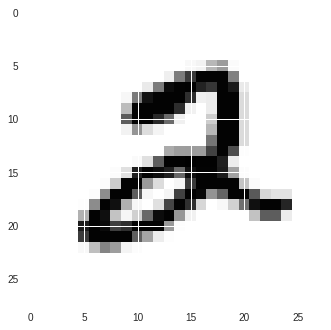

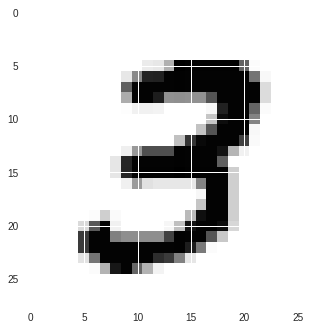

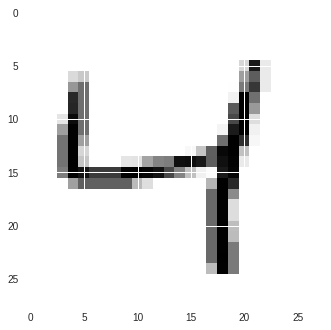

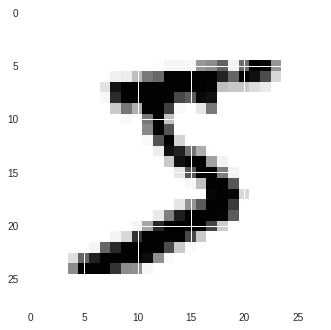

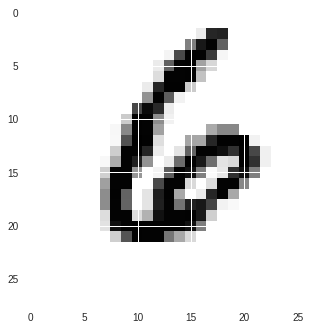

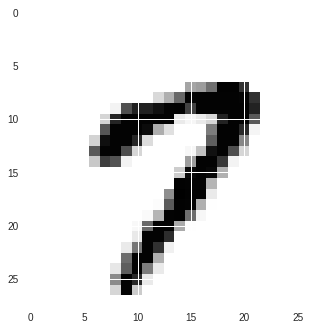

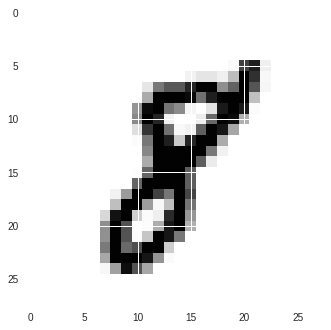

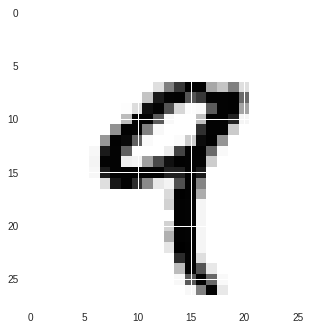

In [2]:
for idx in np.unique(y_train, return_index=True)[1]:
    
    if x_train[idx].shape != (28, 28):
        break;
    
    plt.figure()
    plt.imshow(x_train[idx], cmap='Greys')


### Reshaping

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train.shape

(60000, 28, 28, 1)

In [4]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

y_train.shape

(60000, 10)

### Setting up callback

In [0]:
from keras.callbacks import EarlyStopping
ES_callback = EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=2)

## Simple 3-layer CNN

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

simple_model = Sequential()

simple_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
simple_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

simple_model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
simple_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

simple_model.add(Conv2D(64, (3, 3), activation='relu'))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))

simple_model.add(Flatten())
simple_model.add(Dense(1000, activation='relu'))
simple_model.add(Dense(10, activation='softmax'))

In [0]:
def compile_and_fit(model):
  """
  returns fit history
  """
  model.compile(loss=ks.losses.categorical_crossentropy,
                optimizer=ks.optimizers.SGD(lr=0.01),
                metrics=['accuracy'],
             )

  history = model.fit(x_train, y_train,
            batch_size=128,
            epochs=10,
            verbose=1,
            validation_data=(x_test, y_test),
            callbacks=[ES_callback],
  )
  return history

In [8]:
histories = [] # array of histories and titles to use when plotting
               # learning curves for each model 
  
simple_history = compile_and_fit(simple_model) 
histories.append((simple_history, 'Simple 3-layer CNN'))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 119us/step - loss: 2.2768 - acc: 0.2771 - val_loss: 2.2150 - val_acc: 0.4286
Epoch 2/10
60000/60000 [==============================] - 6s 92us/step - loss: 1.4752 - acc: 0.6134 - val_loss: 0.6762 - val_acc: 0.7646
Epoch 3/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.4805 - acc: 0.8538 - val_loss: 0.3496 - val_acc: 0.8932
Epoch 4/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.3172 - acc: 0.9033 - val_loss: 0.2799 - val_acc: 0.9087
Epoch 5/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.2514 - acc: 0.9230 - val_loss: 0.2120 - val_acc: 0.9312
Epoch 6/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.2156 - acc: 0.9329 - val_loss: 0.1880 - val_acc: 0.9428
Epoch 7/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.1923 - acc: 0.9408 - val_loss: 0.1633 - val_ac

In [9]:
simple_model.evaluate(x_test, y_test, verbose=0)

[0.1341222359754145, 0.9584]

## 3-layer with dropout

In [10]:
dropout_model = Sequential()
dropout_model.add(Dropout(0.2, input_shape=(28,28,1)))

dropout_model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
dropout_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

dropout_model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
dropout_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

dropout_model.add(Conv2D(64, (3, 3), activation='relu'))
dropout_model.add(MaxPooling2D(pool_size=(2, 2)))

dropout_model.add(Dropout(0.2))

dropout_model.add(Flatten())
dropout_model.add(Dense(1000, activation='relu'))
dropout_model.add(Dropout(0.2))
dropout_model.add(Dense(10, activation='softmax'))

dropout_history = compile_and_fit(dropout_model)

histories.append((dropout_history, '3-layer with dropout'))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/step - loss: 2.2891 - acc: 0.2104 - val_loss: 2.2664 - val_acc: 0.4203
Epoch 2/10
60000/60000 [==============================] - 6s 97us/step - loss: 1.9678 - acc: 0.4518 - val_loss: 1.0934 - val_acc: 0.7582
Epoch 3/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.8249 - acc: 0.7425 - val_loss: 0.4622 - val_acc: 0.8687
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.5317 - acc: 0.8360 - val_loss: 0.3115 - val_acc: 0.9087
Epoch 5/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.4192 - acc: 0.8705 - val_loss: 0.2502 - val_acc: 0.9252
Epoch 6/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.3595 - acc: 0.8887 - val_loss: 0.2265 - val_acc: 0.9344
Epoch 7/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.3147 - acc: 0.9031 - val_loss: 0.1877 - val_ac

In [11]:
dropout_model.evaluate(x_test, y_test, verbose=0)

[0.15003519282490016, 0.9542]

## Adding image augmentation

In [12]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(featurewise_center=True, 
                               featurewise_std_normalization=True,
                               zca_whitening=True,
                              )
generator.fit(x_train)

aug_history = dropout_model.fit_generator(generator.flow(x_train, y_train, batch_size=32), samples_per_epoch=len(x_train), epochs=10)
# histories.append((aug_history, '3-layer with dropout and augmentation'))

/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:650: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
   9/1875 [..............................] - ETA: 34s - loss: 1.2291 - acc: 0.7292

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=10, steps_per_epoch=1875)`
  if __name__ == '__main__':


1875/1875 [==============================] - 28s 15ms/step - loss: 0.4493 - acc: 0.8668
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2798 - acc: 0.9152
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2291 - acc: 0.9313
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1976 - acc: 0.9405
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1791 - acc: 0.9471
Epoch 6/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1639 - acc: 0.9504
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1519 - acc: 0.9542
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1388 - acc: 0.9580
Epoch 9/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1340 - acc: 0.9591
Epoch 10/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1234 - acc: 0.9631


In [13]:
dropout_model.evaluate(x_test, y_test, verbose=0)

[0.43485349311828614, 0.8664]

## 4-layer CNN

In [14]:
l4_model = Sequential()
l4_model.add(Dropout(0.2, input_shape=(28,28,1)))

for i in range(3):
    l4_model.add(Conv2D(32, kernel_size=(2,2), activation='relu'))
    l4_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

l4_model.add(Conv2D(64, (2,2), activation='relu'))

l4_model.add(Dropout(0.2))

l4_model.add(Flatten())
l4_model.add(Dense(1000, activation='relu'))
l4_model.add(Dropout(0.2))
l4_model.add(Dense(10, activation='softmax'))

l4_history = compile_and_fit(l4_model)
histories.append((l4_history, '4-layer CNN'))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/step - loss: 2.2856 - acc: 0.2213 - val_loss: 2.2634 - val_acc: 0.4105
Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 2.0657 - acc: 0.3489 - val_loss: 1.6302 - val_acc: 0.4812
Epoch 3/10
60000/60000 [==============================] - 6s 93us/step - loss: 1.2113 - acc: 0.5955 - val_loss: 0.7577 - val_acc: 0.7814
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.7344 - acc: 0.7625 - val_loss: 0.5288 - val_acc: 0.8423
Epoch 5/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.5615 - acc: 0.8187 - val_loss: 0.4208 - val_acc: 0.8731
Epoch 6/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.4633 - acc: 0.8518 - val_loss: 0.3493 - val_acc: 0.8947
Epoch 7/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.3935 - acc: 0.8740 - val_loss: 0.2918 - val_ac

In [15]:
l4_model.evaluate(x_test, y_test, verbose=0)

[0.20446806707084178, 0.9378]

## 5-layer CNN

In [16]:
l5_model = Sequential()
l5_model.add(Dropout(0.2, input_shape=(28,28,1)))

for i in range(3):
    l5_model.add(Conv2D(32, kernel_size=(2,2), activation='relu'))

l5_model.add(Conv2D(32, (2,2), activation='relu'))
l5_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

l5_model.add(Conv2D(64, (2,2), activation='relu'))
l5_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

l5_model.add(Dropout(0.2))

l5_model.add(Flatten())
l5_model.add(Dense(1000, activation='relu'))
l5_model.add(Dropout(0.2))
l5_model.add(Dense(10, activation='softmax'))

l5_history = compile_and_fit(l5_model)
histories.append((l5_history, '5-layer CNN'))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 172us/step - loss: 1.4022 - acc: 0.5370 - val_loss: 0.3498 - val_acc: 0.8998
Epoch 2/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.4032 - acc: 0.8734 - val_loss: 0.1915 - val_acc: 0.9446
Epoch 3/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.2533 - acc: 0.9212 - val_loss: 0.1254 - val_acc: 0.9612
Epoch 4/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.1940 - acc: 0.9379 - val_loss: 0.0963 - val_acc: 0.9692
Epoch 5/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.1614 - acc: 0.9498 - val_loss: 0.0837 - val_acc: 0.9723
Epoch 6/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.1454 - acc: 0.9537 - val_loss: 0.0738 - val_acc: 0.9769
Epoch 7/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.1305 - acc: 0.9598 - val_loss: 0.

In [17]:
l5_model.evaluate(x_test, y_test, verbose=0)

[0.052527515714988114, 0.982]

## 25-layer CNN

In [18]:
l25_model = Sequential()
l25_model.add(Dropout(0.2, input_shape=(28,28,1)))

for i in range(24):
    l25_model.add(Conv2D(32, kernel_size=(2,2), activation='relu'))

l25_model.add(Conv2D(64, (2,2), activation='relu'))
l25_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

l25_model.add(Dropout(0.2))

l25_model.add(Flatten())
l25_model.add(Dense(1000, activation='relu'))
l25_model.add(Dropout(0.2))
l25_model.add(Dense(10, activation='softmax'))

l25_model.compile(loss=ks.losses.categorical_crossentropy,
              optimizer=ks.optimizers.SGD(lr=0.01),
              metrics=['accuracy'],
           )
l25_history = compile_and_fit(l25_model)
histories.append((l25_history, '25-layer CNN'))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 361us/step - loss: 2.3019 - acc: 0.1117 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 20s 338us/step - loss: 2.3005 - acc: 0.1124 - val_loss: 2.2994 - val_acc: 0.1135
Epoch 3/10
60000/60000 [==============================] - 20s 338us/step - loss: 2.2976 - acc: 0.1124 - val_loss: 2.2935 - val_acc: 0.1135
Epoch 4/10
60000/60000 [==============================] - 20s 338us/step - loss: 2.2889 - acc: 0.1186 - val_loss: 2.2742 - val_acc: 0.1397
Epoch 5/10
60000/60000 [==============================] - 20s 339us/step - loss: 2.2525 - acc: 0.1857 - val_loss: 2.1731 - val_acc: 0.2303
Epoch 6/10
60000/60000 [==============================] - 20s 338us/step - loss: 2.1169 - acc: 0.2109 - val_loss: 2.3407 - val_acc: 0.0982
Epoch 7/10
60000/60000 [==============================] - 20s 338us/step - loss: 1.8386 - acc: 0.3137 - val_loss: 1.

In [19]:
l25_model.evaluate(x_test, y_test, verbose=0)

[0.7776459415435791, 0.7323]

## All learning curves & summary

In [20]:
def plt_accuracy_curves(history, title):
  
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(title)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    
def plt_loss_curves(history, title):
  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
histories[2][0].history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

#### Accuracy curves

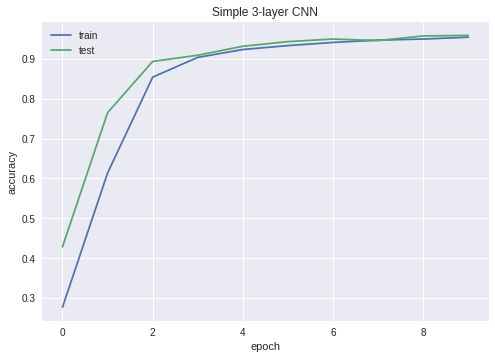

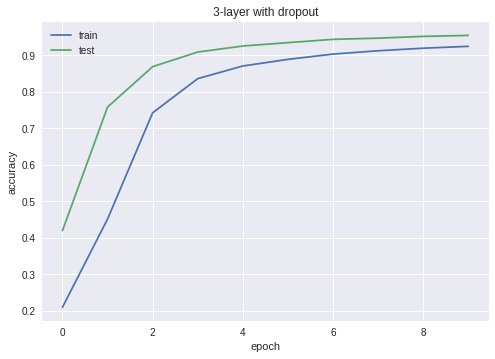

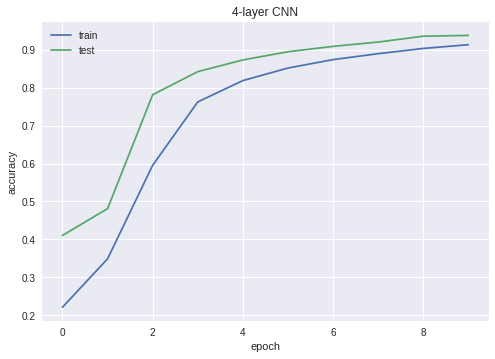

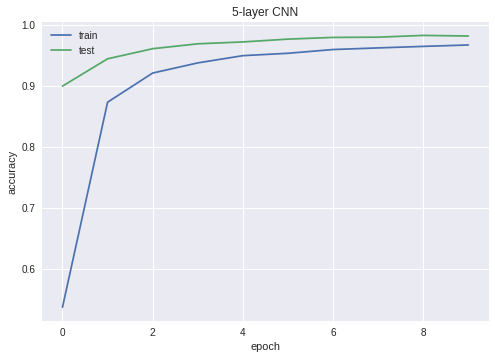

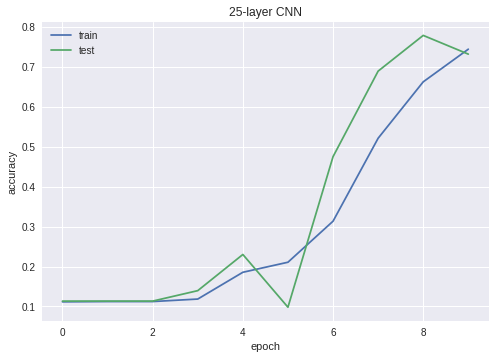

In [21]:
for history, title in histories:
  plt.figure()
  plt_accuracy_curves(history, title)
  

#### Loss curves

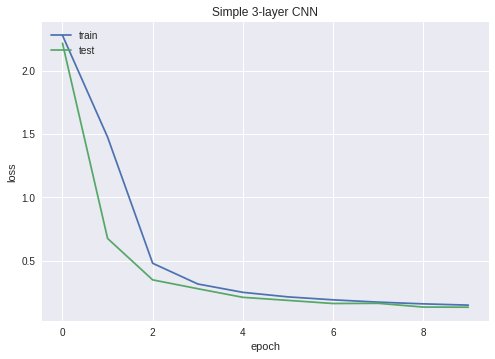

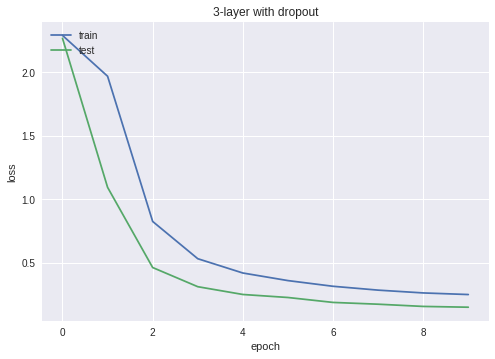

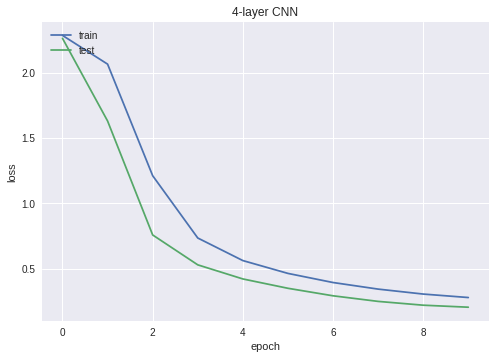

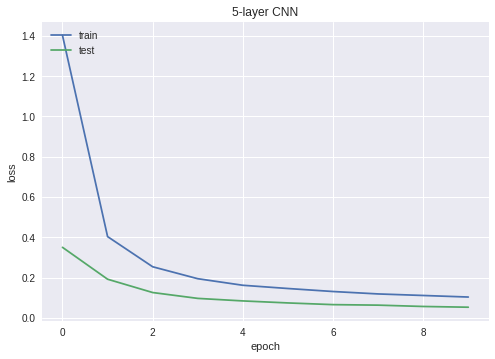

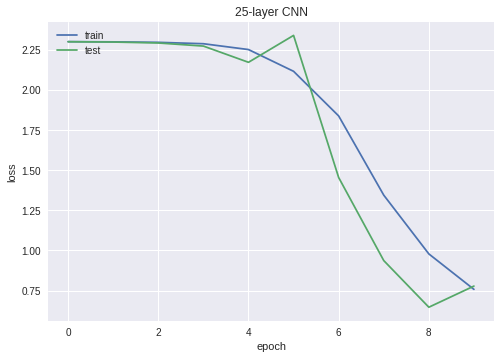

In [22]:
for history, title in histories:
  plt.figure()
  plt_loss_curves(history, title)